In [0]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/emails.csv")
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
corpus = []
for i in range(0, dataset.shape[0]):
    review = review[7:]
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:, 1].values
print(X.shape[1])

25607


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_test_pred, target_names=target_names))


0.9960715844609341
0.9607329842931938
              precision    recall  f1-score   support

     class 0       0.96      0.99      0.97       885
     class 1       0.96      0.87      0.91       261

    accuracy                           0.96      1146
   macro avg       0.96      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146



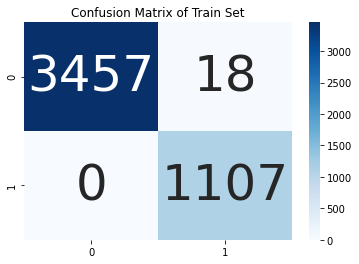

Confusion matrix Classifier's training model:  [[3457   18]
 [   0 1107]]
Confusion matrix Classifier's test model:  [[875  10]
 [ 35 226]]


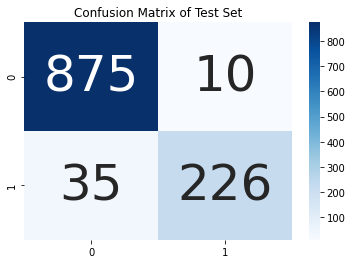

In [48]:
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_train, model.predict(X_train))
# plot_confusion_matrix(model, X_train, Y_train)
plt.title('Confusion Matrix of Train Set')
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 50})
plt.show()
print("Confusion matrix Classifier's training model: ",cm)

cm = confusion_matrix(Y_test, model.predict(X_test))
print("Confusion matrix Classifier's test model: ",cm)
# plot_confusion_matrix(model, X_test, Y_test)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 50})
plt.title('Confusion Matrix of Test Set')
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv = TfidfVectorizer()
X = tv.fit_transform(corpus).toarray()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_test_pred, target_names=target_names))

0.998254037538193
0.9607329842931938
              precision    recall  f1-score   support

     class 0       0.96      0.99      0.97       885
     class 1       0.96      0.87      0.91       261

    accuracy                           0.96      1146
   macro avg       0.96      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146



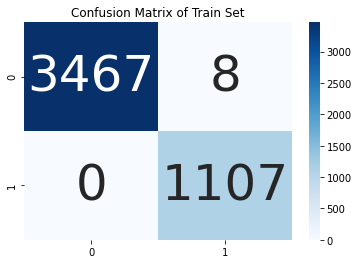

Confusion matrix Classifier's training model:  [[3467    8]
 [   0 1107]]
Confusion matrix Classifier's test model:  [[876   9]
 [ 36 225]]


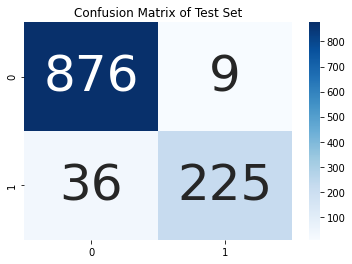

In [52]:
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_train, model.predict(X_train))
# plot_confusion_matrix(model, X_train, Y_train)
plt.title('Confusion Matrix of Train Set')
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 50})
plt.show()
print("Confusion matrix Classifier's training model: ",cm)

cm = confusion_matrix(Y_test, model.predict(X_test))
print("Confusion matrix Classifier's test model: ",cm)
# plot_confusion_matrix(model, X_test, Y_test)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"size": 50})
plt.title('Confusion Matrix of Test Set')
plt.show()